In [6]:
import numpy as np 
import pylab as plt
import pickle 

In [4]:
fileObj = open('../03_15.pkl', 'rb')
embeds = pickle.load(fileObj)
fileObj.close()

In [7]:
metric_name = {
    "m1": "cluster distance",
    "m2": "cluster rank",
    "stress": "stress",
    "NE": "NE"
}

important = ["l2g"]

for graph in embeds["mds"]:    
    for m in ["m1", "m2", "stress", "NE"]:
        if embeds["mds"][graph]["NE"] is None: continue
        m_name = metric_name[m]

        mdsavg = embeds["mds"][graph][m]
        tsneavg = embeds["umap"][graph][m]
        x = [4,8,16,32,64,85,100,150,200,400,600]

        for embed in important:
            if embeds[embed][graph]["NE"] is None: continue
            metric = embeds[embed][graph][m]

            plt.plot(x,metric,'-o',label=f"{embed}")
        plt.plot(x,mdsavg, '-', label="MDS")
        plt.plot(x,tsneavg, '-', label="umap")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
            ncol=3, fancybox=True, shadow=True)
        # plt.legend()
        plt.suptitle(f"{graph}; metric: {m_name}")      
        plt.savefig(f"figures/new_opt_test/{graph}_{m}.png")
        plt.clf()

<Figure size 640x480 with 0 Axes>

In [10]:
import graph_tool.all as gt
import os

In [11]:
path = '../table_graphs/'
graph_paths = os.listdir(path)

# graph_paths = list( map(lambda s: s.split('.')[0], graph_paths) )
graphs = [(gt.load_graph(f"{path+graph}"),graph) for graph in graph_paths]
graphs = sorted(graphs,key=lambda x: x[0].num_vertices())

Text(0, 0.5, 'time in seconds')

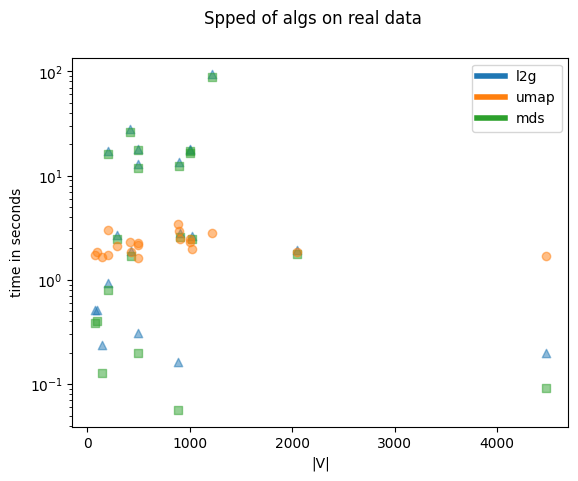

In [38]:
alg = {
    "l2g": "^",
    "umap": "o",
    "mds": "s"
}

c = {
    "l2g": "tab:blue",
    "umap": "tab:orange",
    "mds": "tab:green"
}

fig,ax = plt.subplots()

for embed in embeds:
    for i, G in enumerate(graph_paths):
        if "dagstuhl" in G: continue
        if embeds[embed][G]["NE"] is None: continue
        # if graphs[i][0].num_vertices() > 2000: continue
        ax.scatter(graphs[i][0].num_vertices(), embeds[embed][G]["time"].mean(), c=c[embed], marker=alg[embed],label=embed,alpha=0.5)

ax.set_yscale("log")

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color="tab:blue", lw=4),
                Line2D([0], [0], color="tab:orange", lw=4),
                Line2D([0], [0], color="tab:green", lw=4)]

ax.legend(custom_lines, ['l2g', 'umap', 'mds'])
fig.suptitle("Spped of algs on real data")
ax.set_xlabel("|V|")
ax.set_ylabel("time in seconds")
fig.savefig("proto_time_exp.png")